In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bike_buyers.csv")
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [4]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [5]:
#df["Marital Status"]=df["Marital Status"].fillna(0)
df["Income"]=df["Income"].fillna(0)
df["Children"]=df["Children"].fillna(0)
df.drop(columns=["Region","Occupation","ID","Children","Home Owner"])
#df=df.to_csv("bike_buyers.csv")

,Marital Status,Gender,Income,Education,Cars,Commute Distance,Age,Purchased Bike
0,Married,Female,40000.0,Bachelors,0.0,0-1 Miles,42.0,No
1,Married,Male,30000.0,Partial College,1.0,0-1 Miles,43.0,No
2,Married,Male,80000.0,Partial College,2.0,2-5 Miles,60.0,No
3,Single,NaN,70000.0,Bachelors,1.0,5-10 Miles,41.0,Yes
4,Single,Male,30000.0,Bachelors,0.0,0-1 Miles,36.0,Yes
...,...,...,...,...,...,...,...,...
995,Married,Male,60000.0,High School,2.0,2-5 Miles,54.0,Yes
996,Single,Male,70000.0,Graduate Degree,0.0,2-5 Miles,35.0,Yes
997,Married,NaN,60000.0,Bachelors,0.0,0-1 Miles,38.0,Yes
998,Single,Male,100000.0,Bachelors,3.0,1-2 Miles,38.0,No


In [6]:
def mar(str):
    if str=="Married":
        return 1
    elif str=="Single":
        return 2
    else:
        return 3
    
df["Mar_value"]=df["Marital Status"].apply(mar)
df["Mar_value"]

0      1
1      1
2      1
3      2
4      2
      ..
995    1
996    2
997    1
998    2
999    2
Name: Mar_value, Length: 1000, dtype: int64

In [7]:
def bike_buy(str):
    if str=="Yes":
        return 1
    elif str=="No":
        return 0
    else:
        return -1
    
df["num_buy_bike"]=df["Purchased Bike"].apply(bike_buy)
df["num_buy_bike"]

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: num_buy_bike, Length: 1000, dtype: int64

In [8]:

df["Cars"]=df["Cars"].fillna(0)

df["Home Owner"]=df["Home Owner"].fillna(0)

print(df.isnull().sum())

ID                   0
Marital Status       7
Gender              11
Income               0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
Mar_value            0
num_buy_bike         0
dtype: int64


In [9]:
df_cleaned = df.dropna()
df_cleaned.to_csv("bike_buyers2.csv",index=False)


In [10]:
df=pd.read_csv("bike_buyers2.csv")
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
Mar_value           0
num_buy_bike        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                976 non-null    int64  
 1   Marital Status    976 non-null    object 
 2   Gender            976 non-null    object 
 3   Income            976 non-null    float64
 4   Children          976 non-null    float64
 5   Education         976 non-null    object 
 6   Occupation        976 non-null    object 
 7   Home Owner        976 non-null    object 
 8   Cars              976 non-null    float64
 9   Commute Distance  976 non-null    object 
 10  Region            976 non-null    object 
 11  Age               976 non-null    float64
 12  Purchased Bike    976 non-null    object 
 13  Mar_value         976 non-null    int64  
 14  num_buy_bike      976 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 114.5+ KB


In [12]:
df.describe()

,ID,Income,Children,Cars,Age,Mar_value,num_buy_bike
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,19957.934426,55901.639344,1.893443,1.443648,44.226434,1.462090,0.481557
std,5359.006519,31395.027491,1.621939,1.122680,11.420852,0.498816,0.499916
min,11000.000000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000
25%,15284.000000,30000.000000,0.000000,1.000000,35.000000,1.000000,0.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000,1.000000,0.000000
75%,24500.500000,70000.000000,3.000000,2.000000,52.000000,2.000000,1.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000,2.000000,1.000000


In [13]:

df["Income"].mean()

df["Income"].mode()

df["Mar_value"].mode()

df["Age"].median()

# df["Age"].min()

43.0

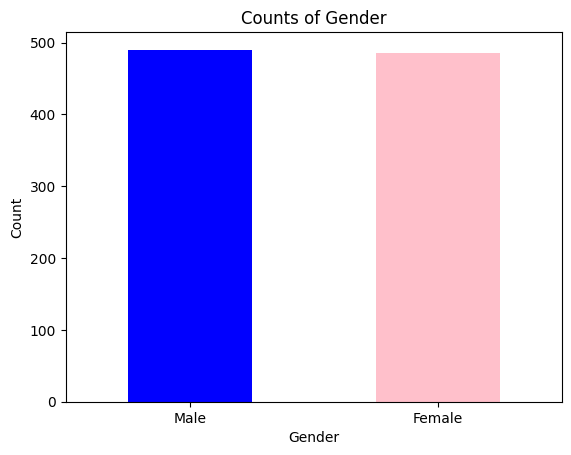

In [14]:

gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

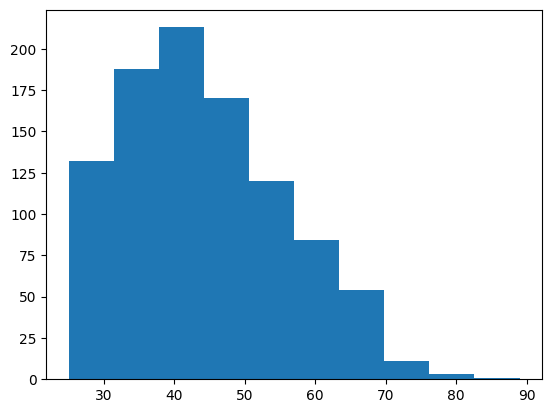

In [15]:
plt.hist(df["Age"])
plt.show()


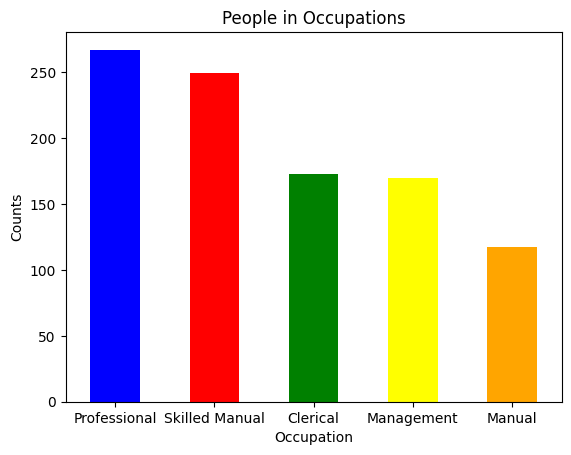

In [16]:

occ_counts = df['Occupation'].value_counts()
occ_counts.plot(kind='bar', color=['blue', 'red',"green","yellow","orange"])
plt.title('People in Occupations')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

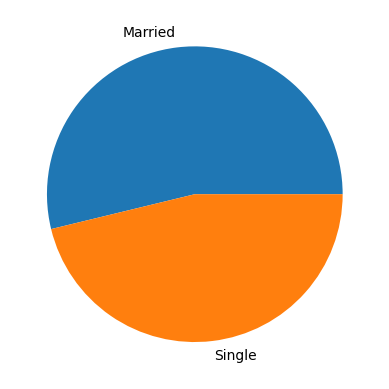

In [17]:
mar_counts = df['Mar_value'].value_counts()
my_label=["Married","Single"]
plt.pie(mar_counts,labels=my_label)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x=df[["Income","Age"]]
y=df["num_buy_bike"]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

model=SVC()
model.fit(x_train,y_train)

accuracy=model.score(x_test,y_test)
accuracy


0.5357142857142857

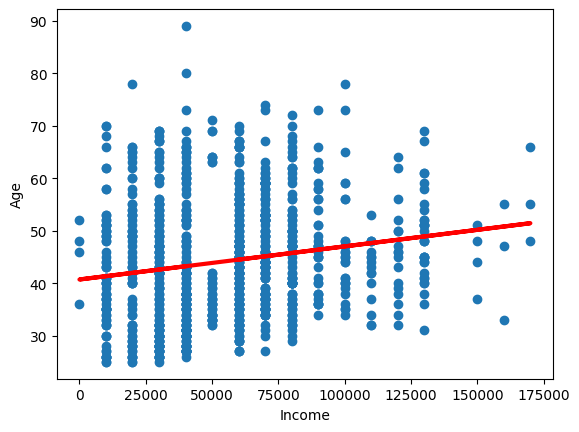

In [19]:
from sklearn import linear_model
from sklearn import datasets

x=df["Income"].values.reshape(len(x),1)

y=df["Age"].values.reshape(len(y),1)
x_train,x_test=x[:999],x[-999:]
y_train,y_test=y[:999],y[-999:]

plt.scatter(x_test,y_test)
plt.xlabel("Income")
plt.ylabel("Age")

regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)

plt.plot(x_test,regr.predict(x_test),color="red",linewidth=3)
plt.show()

#print(str((regr.predict([[52222]]))))